In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu")

dataset_path = "../datasets/auto_mpg/auto-mpg.data"
# ../datasets/auto_mpg
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight",\
               "Acceleration", "Model Year", "Origin"]
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                         na_values= "?", comment="\t",
                         sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()

In [4]:
dataset.head(-1)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1


In [5]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## fix missing values

In [6]:
dataset.Horsepower.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: Horsepower, Length: 398, dtype: bool

In [7]:
dataset.Horsepower.isnull().sum()

6

get indexes of the missing values of a column (Horsepower)

In [8]:
dataset[dataset.Horsepower.isnull()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [9]:
dataset[dataset.Horsepower.isnull()].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [10]:
dataset[dataset.Horsepower.isnull()].index.to_list()

[32, 126, 330, 336, 354, 374]

In [11]:
hp_mi = dataset[dataset.Horsepower.isnull()].index.to_list()

##### fill with mean

In [12]:
# dataset.Horsepower.loc[hp_mi] = dataset.Horsepower.mean()

In [13]:
dataset.Horsepower.loc[hp_mi]

32    NaN
126   NaN
330   NaN
336   NaN
354   NaN
374   NaN
Name: Horsepower, dtype: float64

dataset.plot(y='Horsepower')
plt.show()

dataset.plot(y='Horsepower', x='Model Year', kind='scatter')
plt.show()

dataset.plot(y='Horsepower', x='Weight', kind='scatter')
plt.show()

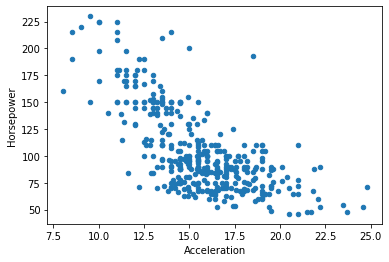

In [14]:
dataset.plot(y='Horsepower', x='Acceleration', kind='scatter')
plt.show()

In [15]:
dataset.loc[hp_mi]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


### linear regression for missing value

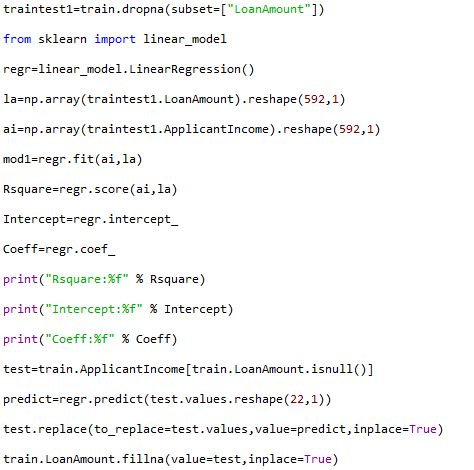

In [16]:
import numpy as np

In [17]:
dataset.dropna(subset=['Horsepower'])['Horsepower'].shape[0]

392

In [18]:
train_mv_y = np.array(dataset.dropna(subset=['Horsepower'])['Horsepower']).reshape(int(dataset.dropna(subset=['Horsepower'])['Horsepower'].shape[0]), 1)
train_mv_x = np.array(dataset.dropna(subset=['Horsepower'])['Weight']).reshape(int(dataset.dropna(subset=['Horsepower'])['Horsepower'].shape[0]), 1)
print(type(train_mv_x))
print(type(train_mv_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
from sklearn import linear_model
regr_mv = linear_model.LinearRegression()

In [20]:
mv_model = regr_mv.fit(X=train_mv_x, y=train_mv_y)

In [21]:
score_r_square = regr_mv.score(X=train_mv_x, y=train_mv_y)

In [22]:
intercept_mv = regr_mv.intercept_

In [23]:
coef_mv = regr_mv.coef_

In [24]:
print(f"score_r_square: {score_r_square}")
print(f"intercept_mv: {intercept_mv}")
print(f"coef_mv: {coef_mv}")

score_r_square: 0.74742549968982
intercept_mv: [-12.1834847]
coef_mv: [[0.03917702]]


In [25]:
regr_mv.predict(np.array(dataset.Weight.loc[hp_mi]).reshape(len(hp_mi),1))

array([[ 67.97269639],
       [100.45044523],
       [ 59.70634536],
       [101.6257558 ],
       [ 78.70719963],
       [106.71876829]])

In [26]:
dataset.Horsepower.loc[hp_mi] = regr_mv.predict(np.array(dataset.Weight.loc[hp_mi]).reshape(len(hp_mi),1)).reshape(6,)

/home/wajeeh-machine/anaconda3/envs/mytf2/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
dataset.Horsepower.describe()

count    398.000000
mean     104.188898
std       38.330757
min       46.000000
25%       75.000000
50%       93.500000
75%      125.000000
max      230.000000
Name: Horsepower, dtype: float64

## we do one_hot_encoding to categorical data

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
dataset.Origin.value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

one_hot_encoder_origin = OneHotEncoder(handle_unknown='ignore')
# dataset.Origin = one_hot_encoder_origin.fit_transform(dataset.Origin)
dataset.Origin = one_hot_encoder_origin.fit_transform(dataset.Origin.values.reshape(-1,1)).toarray()


In [50]:
pd.get_dummies(dataset.Origin).iloc[:,0]
pd.get_dummies(dataset.Origin).iloc[:,1]
pd.get_dummies(dataset.Origin).iloc[:,2]

0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    0
395    0
396    0
397    0
Name: 3, Length: 398, dtype: uint8

In [36]:
origin_col_names = []
for i in list(pd.get_dummies(dataset.Origin).columns):
    print (f"origin_{i}")
    origin_col_names.append(f"origin_{i}")
origin_col_names

origin_1
origin_2
origin_3


['origin_1', 'origin_2', 'origin_3']

In [52]:
dataset[origin_col_names[0]] = pd.get_dummies(dataset.Origin).iloc[:,0]
dataset[origin_col_names[1]] = pd.get_dummies(dataset.Origin).iloc[:,1]
dataset[origin_col_names[2]] = pd.get_dummies(dataset.Origin).iloc[:,2]

In [53]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,1,0,0


In [54]:
dataset = dataset.drop(columns=['Origin'])

In [55]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
